# Introdução a raspagem

## requests-html

Vamos utilizar a biblioteca [requests_html](https://github.com/kennethreitz/requests-html). Caso não tenha o `requests-html` instalado, execute o bloco abaixo:

In [1]:
# !pip install requests-html 

Antes de começar a nossa raspagem, vamos definir um site para raspar. Nesse exemplo o objetivo é obter a lista de parlamentares no estado de Pernambuco. Essa informação temos no Wikipedia

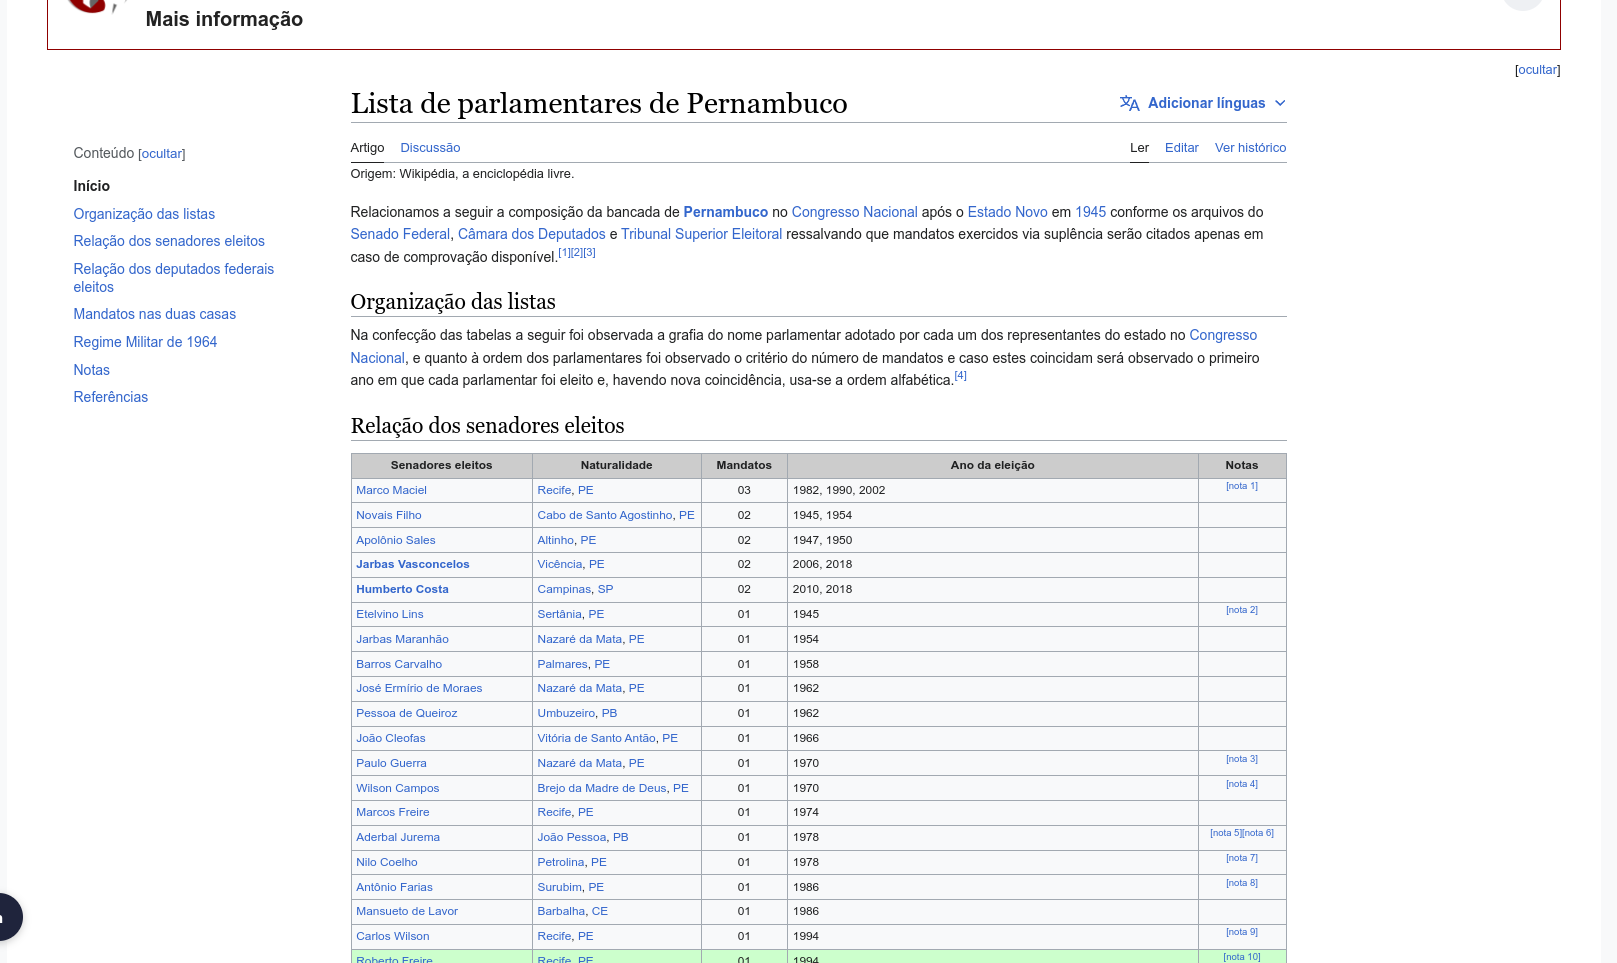

### Etapas de configuração

In [5]:
# URL do Wikipedia
url = (
  "https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Pernambuco"
)

Importação da biblioteca:

In [6]:
from requests_html import HTMLSession

Criação da seção de raspagem de dados. Ela se assemelha com a criação de uma nova aba no navegador.

In [7]:
session = HTMLSession()

Vamos utilizar o método `get()`, para acessar uma URL na internet. Igual como fizemos na semana anterior com a biblioteca `requests`.

In [9]:
r = session.get(url)

Igual como fizemos com o `requests`, aqui também podemos verificar se a requisição foi um sucesso:

In [11]:
r.status_code

200

### Acessando informação na página

Será que seria possível acessar de forma automática todas as urls presentes nessa tabela:

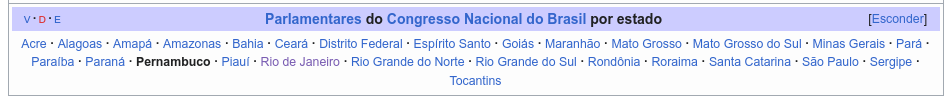

Sim seria! 

Para fazer isso precisamos antes encontrar a tabela na página. Uma forma de fazer isso, é pesquisando pelo título da tabela:

In [12]:
r.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
)

<Element 'table' class=('nowraplinks', 'collapsible', 'show', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>

Mas isso não é suficiente para encontrar as URLs que levam para a lista de parlamentares por estado :( 

No HTML um **hiperlink** é definido com a tag `<a>...</a>`. Então, o que podemos fazer é pesquisar por essa tag dentro da tabela:

Mais informações sobre a tag `<a>` [acesse](https://www.w3schools.com/tags/tag_a.asp).

In [17]:
r.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
).find("a")

[<Element 'a' href='/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil' title='Predefinição:Parlamentares do Brasil'>,
 <Element 'a' href='/w/index.php?title=Predefini%C3%A7%C3%A3o_Discuss%C3%A3o:Parlamentares_do_Brasil&action=edit&redlink=1' class=('new',) title='Predefinição Discussão:Parlamentares do Brasil (página não existe)'>,
 <Element 'a' class=('external', 'text') href='https://pt.wikipedia.org/w/index.php?title=Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil&action=edit'>,
 <Element 'a' href='/wiki/Parlamentar' title='Parlamentar'>,
 <Element 'a' href='/wiki/Congresso_Nacional_do_Brasil' title='Congresso Nacional do Brasil'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_do_Acre' title='Lista de parlamentares do Acre'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_de_Alagoas' title='Lista de parlamentares de Alagoas'>,
 <Element 'a' href='/wiki/Lista_de_parlamentares_do_Amap%C3%A1' title='Lista de parlamentares do Amapá'>,
 <Element 'a' href='/wiki/Lista_de_parlamenta

No comando anterior, procuramos por todos os elementos que possuíssem a tag `<a>`, retornando assim uma lista com todos os elementos e o conteúdo dentro da tag

In [19]:
links = r.html.find(
    "table", 
    containing='Parlamentares do Congresso Nacional do Brasil por estado',
    first=True,
).find("a")

Para acessar apenas a url, precisamos chamar o atributo `absolute_links`

In [20]:
links[0].absolute_links

{'https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil'}

E para obter a string, usamos o `pop()`

In [21]:
links[0].absolute_links.pop()

'https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Parlamentares_do_Brasil'

Com isso, para obter todas as urls da tabela `Parlamentares do Congresso Nacional do Brasil por estado`, vamos filtrar por urls que contenham `Lista_de`:

In [141]:
for link in links:
    if link.absolute_links and "Lista_de" in link.absolute_links.pop():
        print(link.absolute_links)

{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Acre'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Alagoas'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amap%C3%A1'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amazonas'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_da_Bahia'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Cear%C3%A1'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Distrito_Federal_(Brasil)'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Esp%C3%ADrito_Santo'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Goi%C3%A1s'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Maranh%C3%A3o'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso_do_Sul'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Minas_Gerais'}
{'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_

Uma forma de armazenar as urls em uma lista em poucas linhas é com a **compreensão de lista** (list comprehension):

In [22]:
links = [
    link.absolute_links.pop()
    for link in links 
    if link.absolute_links and ("Lista_de" in link.absolute_links.pop())
]

In [23]:
links

['https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Acre',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Alagoas',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amap%C3%A1',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Amazonas',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_da_Bahia',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Cear%C3%A1',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Distrito_Federal_(Brasil)',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Esp%C3%ADrito_Santo',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Goi%C3%A1s',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Maranh%C3%A3o',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Mato_Grosso_do_Sul',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_de_Minas_Gerais',
 'https://pt.wikipedia.org/wiki/Lista_de_parlamentares_

### Explorando mais a página

In [6]:
# Select Elements within Elements
r.html.find("table", first=True)
# r.html.find("table", first=True).text
# r.html.find('a', containing='kenneth')

<Element 'table' class=('wikitable',) style='font-size: 85%;'>

In [43]:
# Search for text on the page:

# r.html.search('({})')
# r.html.search('({ano}) - {name}.')

In [44]:
# Select an Element with a CSS Selector
r.html.find('#mw-content-text')
# r.html.find('.mw-content-text')

[<Element 'div' id='mw-content-text' class=('mw-body-content', 'mw-content-ltr') lang='pt' dir='ltr'>]

In [53]:
r.html.find("#collapsibleTable2")

[]

In [104]:
tables = r.html.find("table")

In [105]:
tables

[<Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('wikitable',) style='font-size: 85%;'>,
 <Element 'table' class=('nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>,
 <Element 'table' class=('nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>,
 <Element 'table' class=('nowraplinks', 'collapsible', 'show', 'navbox-inner') style='border-spacing:0;background:transparent;color:inherit'>]

In [108]:
tables[0].text

'Senadores eleitos\nNaturalidade\nMandatos\nAno da eleição\nHamilton Nogueira\nCampos dos Goytacazes, RJ\n1\n1945\nLuís Carlos Prestes[nota 1]\nPorto Alegre, RS\n1\n1945\nMário Ramos\nRio de Janeiro, RJ\n1\n1947\nAlencastro Guimarães\nSão Sebastião do Caí, RS\n1\n1950\nMozart Lago[nota 2]\nNova Friburgo, RJ\n1\n1950\nCaiado de Castro[nota 3]\nRio de Janeiro, RJ\n1\n1954\nGilberto Marinho[nota 3]\nPelotas, RS\n1\n1954\nAfonso Arinos[nota 4]\nBelo Horizonte, MG\n1\n1958'

In [109]:
table_df = tables[0]

In [111]:
rows = table_df.find("tr")

In [123]:
rows[0].find("th")

[<Element 'th' width='190' style='background-color:#CCCCCC'>,
 <Element 'th' width='190' style='background-color:#CCCCCC'>,
 <Element 'th' width='80' style='background-color:#CCCCCC'>,
 <Element 'th' width='470' style='background-color:#CCCCCC'>]

In [124]:
headers = rows[0].find("th")
headers

[<Element 'th' width='190' style='background-color:#CCCCCC'>,
 <Element 'th' width='190' style='background-color:#CCCCCC'>,
 <Element 'th' width='80' style='background-color:#CCCCCC'>,
 <Element 'th' width='470' style='background-color:#CCCCCC'>]

In [126]:
lista_cabecalho = []

for header in headers:
    lista_cabecalho.append(header.text)

In [127]:
lista_cabecalho

['Senadores eleitos', 'Naturalidade', 'Mandatos', 'Ano da eleição']

In [129]:
dados = []

for row in rows[1:]:
    itens = row.find("td")

    r = []
    
    for item in itens:
#         print(item.text)
        r.append(item.text)

    dados.append(r)

In [130]:
dados

[['Hamilton Nogueira', 'Campos dos Goytacazes, RJ', '1', '1945'],
 ['Luís Carlos Prestes[nota 1]', 'Porto Alegre, RS', '1', '1945'],
 ['Mário Ramos', 'Rio de Janeiro, RJ', '1', '1947'],
 ['Alencastro Guimarães', 'São Sebastião do Caí, RS', '1', '1950'],
 ['Mozart Lago[nota 2]', 'Nova Friburgo, RJ', '1', '1950'],
 ['Caiado de Castro[nota 3]', 'Rio de Janeiro, RJ', '1', '1954'],
 ['Gilberto Marinho[nota 3]', 'Pelotas, RS', '1', '1954'],
 ['Afonso Arinos[nota 4]', 'Belo Horizonte, MG', '1', '1958']]

In [131]:
import pandas as pd

In [133]:
pd.DataFrame(dados, columns=lista_cabecalho)

,Senadores eleitos,Naturalidade,Mandatos,Ano da eleição
0,Hamilton Nogueira,"Campos dos Goytacazes, RJ",1,1945
1,Luís Carlos Prestes[nota 1],"Porto Alegre, RS",1,1945
2,Mário Ramos,"Rio de Janeiro, RJ",1,1947
3,Alencastro Guimarães,"São Sebastião do Caí, RS",1,1950
4,Mozart Lago[nota 2],"Nova Friburgo, RJ",1,1950
5,Caiado de Castro[nota 3],"Rio de Janeiro, RJ",1,1954
6,Gilberto Marinho[nota 3],"Pelotas, RS",1,1954
7,Afonso Arinos[nota 4],"Belo Horizonte, MG",1,1958


# pandas

In [8]:
import pandas as pd

url = (
  "https://pt.wikipedia.org/wiki/Lista_de_parlamentares_do_Rio_Grande_do_Norte"
)

tables = pd.read_html(url)

In [9]:
print(f'Total tables: {len(tables)}')

Total tables: 4


In [10]:
tables[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Deputados federais eleitos  64 non-null     object
 1   Naturalidade                64 non-null     object
 2   Mandatos                    64 non-null     int64 
 3   Ano da eleição              64 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [11]:
tables[1].head()

,Deputados federais eleitos,Naturalidade,Mandatos,Ano da eleição
0,Henrique Eduardo Alves,"Rio de Janeiro, RJ",11,"1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998..."
1,Vingt Rosado,"Mossoró, RN",7,"1962, 1966, 1970, 1974, 1978, 1982, 1986"
2,Aluizio Alves[nota 12],"Angicos, RN",6,"1945, 1950, 1954, 1958, 1966, 1990"
3,Djalma Marinho[nota 13],"São José do Campestre, RN",6,"1954, 1958, 1962, 1966, 1970, 1978"
4,Ney Lopes[nota 12],"Natal, RN",5,"1974, 1990, 1994, 1998, 2002"


In [24]:
tables[1].groupby("Naturalidade")["Ano da eleição"].count().sort_values(ascending=False)

Naturalidade
Natal, RN                    13
Mossoró, RN                  10
Caicó, RN                     4
Rio de Janeiro, RJ            4
Santana do Matos, RN          3
Santa Cruz, RN                3
Recife, PE                    3
Campina Grande, PB            2
Catolé do Rocha, PB           2
Ceará-Mirim, RN               2
Pau dos Ferros, RN            2
Parelhas, RN                  1
São José do Campestre, RN     1
Santa Rita, PB                1
Pirpirituba, PB               1
Patu, RN                      1
Angicos, RN                   1
Nova Palmeira, PB             1
Areia Branca, RN              1
Macaíba, RN                   1
João Pessoa, PB               1
João Câmara, RN               1
Fortaleza, CE                 1
Florânia, RN                  1
Extremoz, RN                  1
Brejo do Cruz, PB             1
Umarizal, RN                  1
Name: Ano da eleição, dtype: int64

In [14]:
tables[0].shape, tables[1].shape

((20, 4), (64, 4))

In [12]:
tables[0].append(tables[1])

,Senadores eleitos,Naturalidade,Mandatos,Ano da eleição,Deputados federais eleitos
0,Dinarte Mariz[nota 1],"Serra Negra do Norte, RN",4,"1954, 1962, 1970, 1978",NaN
1,José Agripino Maia[nota 2],"Mossoró, RN",4,"1986, 1994, 2002, 2010",NaN
2,Garibaldi Alves Filho[nota 3],"Natal, RN",3,"1990, 2002, 2010",NaN
3,Georgino Avelino[nota 4],"Angicos, RN",2,"1945, 1954",NaN
4,Jessé Freire[nota 5],"Macaíba, RN",2,"1970, 1978",NaN
...,...,...,...,...,...
59,NaN,"Natal, RN",1,2014,Antônio Jácome
60,NaN,"Brejo do Cruz, PB",1,2014,Zenaide Maia
61,NaN,"Santana do Matos, RN",1,2018,Benes Leocádio
62,NaN,"Fortaleza, CE",1,2018,Eliéser Girão


In [10]:
# !pip install html5lib

In [5]:
# tables_match = pd.read_html(url, match='Estado da Guanabara')
# len(tables_match)